In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc
import matplotlib.colors as colors

In [2]:
plt.rc('font',size=25)
pd.set_option('max_column',200)

In [3]:
x=pd.read_csv('../Downloads/catalog/field_Tian_Qiu.csv')

In [24]:
z=pd.read_csv('../Downloads/catalog/320107_hsc_field.csv')

In [21]:
y=pd.read_csv('../Downloads/catalog/334950.csv')

In [48]:
y[(y.llcra>0.2)&(y.llcra<0.8)&(y.llcdec<0.36)&(y.llcdec>0.26)]

,# frame_num,frame_id,exp_id,visit,ccd,pointing,object,naxis1,naxis2,ra,dec,ra2000,dec2000,llcra,llcdec,ulcra,ulcdec,lrcra,lrcdec,urcra,urcdec,mjd
18,116622099,HSCA11662253,HSCE00116622,116622,99,1997,SSP-Wide,2048,4176,00:02:59.905,-00:23:59.94,0.433202,0.274608,0.528173,0.320683,0.341730,0.314846,0.526646,0.232547,0.338610,0.227527,57924.577795
51,116624098,HSCA11662454,HSCE00116624,116624,98,1997,SSP-Wide,2048,4176,00:02:59.902,-00:24:00.01,0.636123,0.278539,0.731459,0.323183,0.541829,0.320840,0.731504,0.234677,0.540425,0.232668,57924.578504
57,116624099,HSCA11662453,HSCE00116624,116624,99,1997,SSP-Wide,2048,4176,00:02:59.902,-00:24:00.01,0.433208,0.274611,0.528165,0.320672,0.341771,0.314688,0.526644,0.232575,0.338640,0.227545,57924.578504
132,116622098,HSCA11662254,HSCE00116622,116622,98,1997,SSP-Wide,2048,4176,00:02:59.905,-00:23:59.94,0.636109,0.278545,0.731437,0.323180,0.541826,0.320838,0.731503,0.234674,0.540405,0.232669,57924.577795
205,116642021,HSCA11664334,HSCE00116642,116642,21,1997,SSP-Wide,2048,4176,00:05:35.789,+00:43:30.07,0.886830,0.334362,0.796423,0.291186,0.981404,0.286215,0.793706,0.382752,0.979646,0.378979,57924.594676
227,116644021,HSCA11664534,HSCE00116644,116644,21,1997,SSP-Wide,2048,4176,00:05:35.788,+00:43:30.01,0.886809,0.334358,0.796401,0.291186,0.981392,0.286213,0.793676,0.382754,0.979627,0.378976,57924.595382
359,118896099,HSCA11889653,HSCE00118896,118896,99,2003,SSP-Wide,2048,4176,00:02:59.904,-00:23:59.90,0.431436,0.275692,0.526397,0.321748,0.339980,0.315722,0.524874,0.233666,0.336817,0.228626,57930.591498
363,118898098,HSCA11889854,HSCE00118898,118898,98,2003,SSP-Wide,2048,4176,00:02:59.909,-00:23:59.91,0.634346,0.279585,0.729673,0.324231,0.540060,0.321878,0.729718,0.235731,0.538650,0.233721,57930.592200
367,118896098,HSCA11889654,HSCE00118896,118896,98,2003,SSP-Wide,2048,4176,00:02:59.904,-00:23:59.90,0.634317,0.279621,0.729659,0.324254,0.540029,0.321913,0.729695,0.235766,0.538611,0.233767,57930.591498
387,118898099,HSCA11889853,HSCE00118898,118898,99,2003,SSP-Wide,2048,4176,00:02:59.909,-00:23:59.91,0.431461,0.275662,0.526394,0.321718,0.340018,0.315734,0.524897,0.233624,0.336892,0.228586,57930.592200


In [47]:
y

,# frame_num,frame_id,exp_id,visit,ccd,pointing,object,naxis1,naxis2,ra,dec,ra2000,dec2000,llcra,llcdec,ulcra,ulcdec,lrcra,lrcdec,urcra,urcdec,mjd
0,116618054,HSCA11661811,HSCE00116618,116618,54,1997,SSP-Wide,2048,4176,23:57:48.134,-00:23:59.87,0.155012,-0.302638,0.242472,-0.257200,0.063746,-0.255172,0.243564,-0.349622,0.064546,-0.349111,57924.574421
1,116618022,HSCA11661827,HSCE00116618,116618,22,1997,SSP-Wide,2048,4176,23:57:48.134,-00:23:59.87,0.152315,-0.688502,0.240859,-0.640024,0.062984,-0.644448,0.237830,-0.730940,0.061128,-0.737105,57924.574421
2,116620046,HSCA11662015,HSCE00116620,116620,46,1997,SSP-Wide,2048,4176,23:57:48.135,-00:23:59.90,0.155513,-0.399433,0.243524,-0.353025,0.064498,-0.352558,0.243670,-0.445597,0.064672,-0.446651,57924.575121
3,116620022,HSCA11662027,HSCE00116620,116620,22,1997,SSP-Wide,2048,4176,23:57:48.135,-00:23:59.90,0.152306,-0.688509,0.240856,-0.640082,0.062922,-0.644421,0.238201,-0.731094,0.061120,-0.737104,57924.575121
4,116618062,HSCA11661807,HSCE00116618,116618,62,1997,SSP-Wide,2048,4176,23:57:48.134,-00:23:59.87,0.153626,-0.206164,0.240404,-0.161964,0.062286,-0.158170,0.242410,-0.253905,0.063693,-0.251677,57924.574421
5,116618030,HSCA11661823,HSCE00116618,116618,30,1997,SSP-Wide,2048,4176,23:57:48.134,-00:23:59.87,0.154209,-0.592799,0.242771,-0.544911,0.064124,-0.547548,0.241022,-0.636753,0.062979,-0.641025,57924.574421
6,116620054,HSCA11662011,HSCE00116620,116620,54,1997,SSP-Wide,2048,4176,23:57:48.135,-00:23:59.90,0.155003,-0.302650,0.242459,-0.257216,0.063732,-0.255190,0.243554,-0.349645,0.064529,-0.349130,57924.575121
7,116618100,HSCA11661831,HSCE00116618,116618,100,1997,SSP-Wide,2048,4176,23:57:48.134,-00:23:59.87,0.102560,-0.833753,0.061042,-0.742141,0.055256,-0.927279,0.149244,-0.739382,0.142342,-0.923323,57924.574421
8,116620030,HSCA11662023,HSCE00116620,116620,30,1997,SSP-Wide,2048,4176,23:57:48.135,-00:23:59.90,0.154197,-0.592805,0.242799,-0.544903,0.064121,-0.547560,0.241043,-0.636786,0.062956,-0.641023,57924.575121
9,116618102,HSCA11661835,HSCE00116618,116618,102,1997,SSP-Wide,2048,4176,23:57:48.134,-00:23:59.87,0.101206,0.034869,0.148113,-0.059365,0.140612,0.124329,0.059854,-0.056888,0.053520,0.128217,57924.574421


In [23]:
x[(x.raMin>310)&(x.raMin<310.5)&(x.decMin<-1)]

,fieldID,skyVersion,run,rerun,camcol,field,nObjects,nChild,nGalaxy,nStars,raMin,raMax,decMin,decMax,mjd_u,mjd_g,mjd_r,mjd_i,mjd_z
5,8647474690312634368,15,106,2,1,68,3681,1933,780,1964,310.023575,310.187255,-1.266346,-1.041611,0.000000,0.000000,0.000000,0.000000,0.000000
6,8647474690312699904,15,106,2,1,69,3989,2205,1030,1987,310.173294,310.336980,-1.266345,-1.041527,0.000000,0.000000,0.000000,0.000000,0.000000
7,8647474690312765440,15,106,2,1,70,4008,2251,977,2042,310.323003,310.486690,-1.266244,-1.041503,0.000000,0.000000,0.000000,0.000000,0.000000
8,8647474690312830976,15,106,2,1,71,3879,2128,1006,1917,310.473153,310.636173,-1.266344,-1.041789,0.000000,0.000000,0.000000,0.000000,0.000000
4439,8647475119809363968,15,206,2,1,68,4048,2298,918,2160,310.023571,310.187254,-1.056564,-0.831723,0.000000,0.000000,0.000000,0.000000,0.000000
4440,8647475119809429504,15,206,2,1,69,3873,2202,926,2005,310.173293,310.336974,-1.056565,-0.831821,0.000000,0.000000,0.000000,0.000000,0.000000
4441,8647475119809495040,15,206,2,1,70,4216,2526,1117,2127,310.323114,310.486681,-1.056564,-0.831393,0.000000,0.000000,0.000000,0.000000,0.000000
4442,8647475119809560576,15,206,2,1,71,4301,2532,1151,2156,310.472712,310.636394,-1.056565,-0.831791,0.000000,0.000000,0.000000,0.000000,0.000000
16929,8658174750927028224,15,1040,40,1,67,1732,507,313,1072,310.132036,310.297072,-1.264936,-1.040764,51465.136716,51465.138375,51465.135057,51465.135887,51465.137545
16930,8658174750927093760,15,1040,40,1,68,1747,615,310,1075,310.281714,310.446753,-1.264873,-1.040651,51465.137131,51465.138789,51465.135472,51465.136301,51465.137960


# HSC catalog

In [8]:
h=pd.read_csv('../Downloads/catalog/318355_using.csv')

In [9]:
i=pd.read_csv('../Downloads/catalog/320717_hsc_i_ext.csv')

In [10]:
m=pd.merge(i,h,on='# object_id')

In [13]:
m=m.drop(m.iloc[:,[0,3]],axis=1)

In [ ]:
m.to_csv('../Downloads/catalog/final/hscall.csv',index=False)

In [7]:
h=pd.read_csv('../Downloads/catalog/final/hscall.csv')

In [8]:
h['ra'][h.ra>180]=h[h.ra>180].ra-360
h['i_sdsscentroid_ra'][h.i_sdsscentroid_ra>180]=h[h.i_sdsscentroid_ra>180].i_sdsscentroid_ra-360

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
h=h[(h.i_sdsscentroid_dec<1.25)&(h.i_sdsscentroid_dec>-1.25)&(h.i_sdsscentroid_ra<36)&(h.i_sdsscentroid_ra>-30)]

In [11]:
h.to_csv('../Downloads/catalog/final/hscall.csv',index=False)

# merge the true mjd

## HSC mjd should run at gfram

In [6]:
h=pd.read_csv('../Downloads/catalog/sub1/hcut0.csv')

In [7]:
h

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,# object_id,i_extendedness_value,ra_1,dec_1,r_extendedness_value,i_sdsscentroid_ra,i_sdsscentroid_dec,i_sdsscentroid_rasigma,i_sdsscentroid_decsigma,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,g_cmodel_magsigma,r_cmodel_magsigma,i_cmodel_magsigma,z_cmodel_magsigma,g_psfflux_mag,r_psfflux_mag,i_psfflux_mag,z_psfflux_mag,g_psfflux_magsigma,r_psfflux_magsigma,i_psfflux_magsigma,z_psfflux_magsigma,a_g,a_r,a_i,a_z,col1,ra_2,dec_2,flags,type,rowc_r,colc_r,rowcErr_r,colcErr_r,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,psfmag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,Separation,ra_s_error,dec_s_error,dra,ddec,dra_err,ddec_err,pmra,pmdec,pmra_err,pmdec_err,mjd0,mjd1,mjd2,mjd3,mjd4,mjd5,mjd6,mjd7,mjd8
0,0,0,0,40580779452928524,1.0,2.310664,-1.258066,1.0,2.310664,-1.258066,0.013759,0.014307,24.4619942,23.899471,23.535782,23.462990,0.099714,0.043152,0.033008,0.103062,24.456739,23.972435,23.626913,23.539484,0.090613,0.043215,0.033081,0.102039,0.104923,0.073706,0.052883,0.040901,108515,2.310640,-1.258021,281543964622848,3,348.32100,76.17605,0.317189,0.271763,24.11594,24.46697,24.09733,23.45108,23.77822,0.351849,0.275254,0.195684,0.174669,0.807595,24.30684,24.53759,24.20401,23.53817,23.93415,0.387628,0.263682,0.188161,0.164761,0.830537,0.166954,0.122843,0.089096,0.067559,0.047900,0.183242,0.125607,0.107618,0.085437,-0.162116,0.126358,0.108565,8.543676,-16.211636,12.635828,10.856508,58014.482980,58014.496452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,40580779452928548,1.0,2.278924,-1.257174,1.0,2.278924,-1.257174,0.016375,0.018094,24.7525749,24.017506,23.557550,23.348194,0.125705,0.041893,0.038447,0.096732,24.859569,24.154577,23.749771,23.499868,0.120661,0.042013,0.038992,0.097353,0.104528,0.073427,0.052683,0.040746,158985,2.278899,-1.257148,281543964623104,3,1420.76700,84.10793,0.257100,0.559324,24.90568,24.90508,23.94729,23.50481,23.75410,0.724854,0.420654,0.178245,0.192434,0.801492,25.07703,25.08233,24.11266,23.69226,23.74599,0.769065,0.430481,0.172368,0.188811,0.676245,0.166331,0.122385,0.088764,0.067307,0.047721,0.127509,0.101812,0.221492,0.088014,-0.092282,0.103120,0.222230,8.801363,-9.228194,10.312002,22.223027,58014.482980,58014.496452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,40580779452928593,1.0,2.210787,-1.255828,1.0,2.210785,-1.255828,0.032324,0.115351,23.6776161,23.482397,23.331425,23.079914,0.062061,0.046297,0.049506,0.110051,24.014164,24.156048,24.074404,23.704250,0.060675,0.050039,0.054134,0.117770,0.102047,0.071685,0.051433,0.039780,316080,2.210744,-1.255642,281709320864000,3,801.17550,97.79578,0.527626,0.777823,24.07228,23.79331,23.40179,23.26456,22.44396,0.431318,0.200443,0.148768,0.212058,0.326430,24.54492,24.13645,24.05863,23.98194,23.11720,0.473005,0.179830,0.164019,0.246300,0.381887,0.162368,0.119469,0.086649,0.065703,0.046584,0.683252,0.208940,0.308018,0.147661,-0.667113,0.211425,0.328909,14.766101,-66.711284,21.142545,32.890851,58014.482980,58014.496452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,40580779452928609,1.0,2.242795,-1.255321,1.0,2.242795,-1.255321,0.007715,0.008402,22.360569,21.841927,20.946529,20.742248,0.026038,0.009823,0.005567,0.011478,23.123737,22.517197,21.762417,21.287193,0.027753,0.011306,0.006407,0.012538,0.102395,0.071929,0.051608,0.039915,1810693,2.242785,-1.255308,68987912208,3,1092.45300,100.83730,0.074751,0.061646,24.14201,22.78137,21.87565,21.07941,20.69295,0.400117,0.067845,0.030891,0.024354,0.056015,24.44041,23.06134,22.23006,21.44162,21.06805,0.431335,0.067824,0.031279,0.024433,0.059118,0.162928,0.119881,0.086948,0.065930,0.046745,0.059362,0.029601,0.024412,0.037072,-0.046371,0.030590,0.025817,3.707159,-4.637068,3.059017,2.581740,58014.482980,58014.496452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,40580779452928700,1.0,2.163009,-1.252544,NaN,2.163009,-1.252544,0.013274,0.021375,NaN,NaN,22.455580,21.943636,NaN,NaN,0.017838,0.034467,NaN,NaN,23.085403,22.

## S82 mjd

In [7]:
sm=pd.read_csv('../Downloads/catalog/final/S82_mjd.csv')

In [9]:
sm=sm.iloc[:,[1,2,3,-1]]

In [27]:
s=pd.read_csv('../Downloads/catalog/final/S82all.csv')

In [18]:
sr=pd.read_csv('../Downloads/catalog/allra_Tian_Qiu.csv')

,objID,ra,dec,run,rerun,camcol,field,flags,type,rowc_r,colc_r,rowcErr_r,colcErr_r,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,psfmag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
0,8647474690858746529,331.219991,-0.637362,106,2,2,209,2.684355e+08,3.0,794.0506,1904.43900,0.014012,0.014777,20.36645,19.12070,18.49315,18.13272,17.89656,0.034068,0.006722,0.005158,0.005271,0.013118,21.59503,20.43843,19.92095,19.61562,19.25542,0.041769,0.005636,0.004746,0.005064,0.013349,0.464706,0.341926,0.247994,0.188046,0.133327
1,8647474690327119144,343.174160,-1.245701,106,2,1,289,6.898791e+10,3.0,588.3149,188.16980,0.616183,1.189245,23.44522,23.12333,22.79456,21.90022,21.41164,0.292166,0.123602,0.106686,0.073277,0.153059,23.77274,23.60394,23.48066,22.52661,21.90536,0.281180,0.129633,0.113984,0.077787,0.152646,0.468239,0.344526,0.249879,0.189476,0.134341
2,8647474690339374135,11.225831,-1.066942,106,2,1,476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8647474691955032749,22.754568,0.108234,106,2,4,553,2.684355e+08,3.0,1106.2120,1054.40000,0.017351,0.012744,21.38661,20.23790,19.69571,19.33583,19.18938,0.043486,0.007318,0.006287,0.006775,0.026822,21.90442,20.73259,20.32396,20.02141,19.84782,0.045773,0.005991,0.005726,0.006335,0.023411,0.170259,0.125275,0.090860,0.068896,0.048848
4,8647474690327249705,343.545732,-1.193276,106,2,1,291,2.684357e+08,3.0,1244.2420,664.76260,0.038077,0.028031,23.73124,21.67348,20.41802,19.88356,19.48757,0.382834,0.033693,0.012213,0.012002,0.026806,24.08729,22.15124,21.00233,20.50126,20.01472,0.385190,0.035603,0.012817,0.012434,0.028317,0.372643,0.274187,0.198864,0.150792,0.106914
5,8647474690870477628,358.061677,-0.670317,106,2,2,388,6.898791e+10,3.0,1190.3800,1604.84500,0.037968,0.042784,23.47369,22.81191,21.74006,21.30523,20.98997,0.233810,0.044820,0.025077,0.026189,0.070335,23.61444,22.94609,21.93823,21.52625,21.18578,0.235218,0.043028,0.023554,0.024742,0.068952,0.145811,0.107286,0.077813,0.059003,0.041834
6,8647474690873622712,5.190603,-0.766166,106,2,2,436,2.684357e+08,3.0,670.7964,733.48930,0.080087,0.092003,23.81872,23.42027,22.27338,21.47990,21.03379,0.380481,0.094474,0.049262,0.037557,0.087956,24.19747,23.83410,22.73140,21.97446,21.43368,0.385339,0.095074,0.048406,0.036706,0.082060,0.142481,0.104836,0.076036,0.057656,0.040879
7,8647474691931702100,329.441927,0.009113,106,2,4,197,2.684357e+08,3.0,961.8409,153.30190,0.059561,0.054935,23.70509,22.38231,20.89497,20.32878,19.81264,0.434567,0.044758,0.018538,0.017464,0.048618,24.21984,23.05781,21.74923,21.21000,20.60428,0.439051,0.893740,0.696947,0.421741,0.056411,0.281362,0.207023,0.150151,0.113855,0.080724
8,8647474691945398284,0.638799,0.055412,106,2,4,406,2.684357e+08,3.0,120.7655,574.20260,0.248538,0.172744,23.77500,23.07092,22.48850,22.09045,21.86052,0.464681,0.085382,0.074985,0.085357,0.301046,24.30666,23.85867,23.37154,23.16729,22.66384,0.386204,0.089892,0.079175,0.101241,0.299737,0.158988,0.116982,0.084845,0.064335,0.045615
9,8647474691952411949,16.797480,0.110066,106,2,4,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Star

In [15]:
ms=pd.read_csv('../Downloads/catalog/final/starnewFeH.csv')

In [17]:
ms['pmra_cl']=ms.pmra_cl-0.0559

In [20]:
ms['pmdec_cl']=ms.pmdec_cl+0.5437

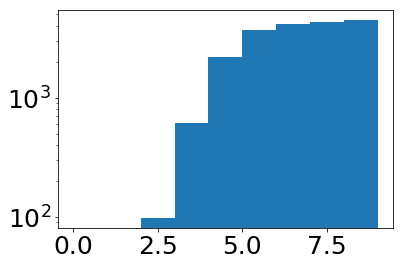

In [78]:
plt.hist(mn.Dkpc,bins=range(10))
plt.yscale('log')

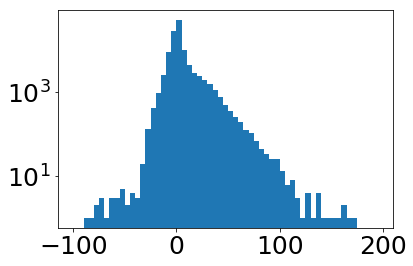

In [73]:
plt.hist(ms[(ms.galcen_z<-4)&(ms.gr<0.6)].Dkpc-mn.Dkpc,bins=np.arange(-100,200,5))
plt.yscale('log')

In [46]:
mn=ms[(ms.galcen_z<-4)&(ms.gr<0.6)]

In [22]:
ms.to_csv('../Downloads/catalog/final/starnewFeH.csv',index=False)

In [64]:
mn['gi']=mn.g_psfflux_mag-mn.i_psfflux_mag
mn['Dkpc']=getMainSequenceDistanceKpc(mn.gi,mn.FeH,mn.r_psfflux_mag)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


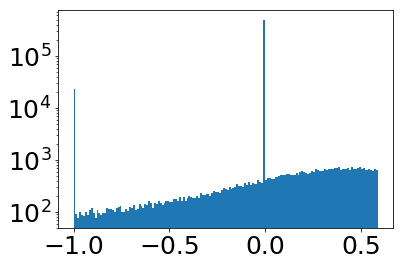

In [43]:
plt.hist(ms.FeH-ms.FeH2,bins=np.arange(-1,0.6,0.01))
plt.yscale('log')

In [37]:
ms['FeH2']=ms.FeH

In [20]:
max(ms[ms.galcen_z>-4].galcen_x**2+ms[ms.galcen_z>-4].galcen_y**2)

120.07337477295809

(array([   405.,    432.,    465.,    496.,    546.,    565.,    594.,
           607.,    669.,    720.,    724.,    817.,    906.,    915.,
           983.,   1090.,   1185.,   1282.,   1464.,   1517.,   1825.,
          1923.,   2217.,   2555.,   2899.,   3250.,   3517.,   4156.,
          4657.,   5123.,   5743.,   6365.,   7054.,   7792.,   8613.,
          9468.,  10376.,  11404.,  12455.,  13445.,  14855.,  15745.,
         17389.,  19632.,  22756.,  27978.,  39459.,  65039., 113189.]),
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1]),
 <a list of 49 Patch objects>)

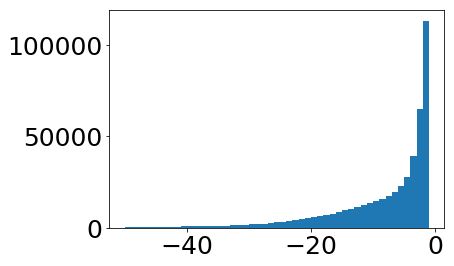

In [10]:
plt.hist(ms.galcen_z,bins=range(-50,0))

In [18]:
gi=m.g_psfflux_mag-m.i_psfflux_mag
gr=m.g_psfflux_mag-m.r_psfflux_mag
ug=m.psfmag_u-m.g_psfflux_mag
FeH=getPhotomMetallicityBond2010(ug,gr)
Dkpc=getMainSequenceDistanceKpc(gi,FeH,m.r_psfflux_mag)

In [20]:
m['ug']=ug
m['gr']=gr
m['gi']=gi
m['FeH']=FeH
m['Dkpc']=Dkpc

In [22]:
m=m.drop(m[m.Dkpc.isna()].index)

In [24]:
m.to_csv('../Downloads/catalog/final/starall.csv',index=False)

In [29]:
n=pd.read_csv('../Downloads/33.csv')

In [32]:
h=pd.merge(n,h,on='# object_id')

In [51]:
hp=h[h.isprimary]

In [52]:
hp.to_csv('../Downloads/catalog/final/hscallprimary.csv',index=False)

In [3]:
m=pd.read_csv('../Downloads/catalog/final/starall_sm.csv')

In [6]:
m=m.drop(m.iloc[:,[0]],axis=1)

In [12]:
m['v_ra']=m.Dkpc*m.pmra_cl/3600*3.26156*300000*np.pi/180

In [13]:
m['v_dec']=m.Dkpc*m.pmdec_cl/3600*3.26156*300000*np.pi/180

In [11]:
m['v_ra_sm']=m.Dkpc*m.pmra_cl_sm/3600*3.26156*300000*np.pi/180
m['v_dec_sm']=m.Dkpc*m.pmdec_cl_sm/3600*3.26156*300000*np.pi/180
m['v_b']=m.Dkpc*m.pm_b/3600*3.26156*300000*np.pi/180
m['v_lcosb']=m.Dkpc*m.pm_lcosb/3600*3.26156*300000*np.pi/180
m['v_b_']=m.Dkpc*m.pm_b/3600*3.26156*300000*np.pi/180

,# object_id,i_extendedness_value,ra_1,dec_1,r_extendedness_value,i_sdsscentroid_ra,i_sdsscentroid_dec,i_sdsscentroid_rasigma,i_sdsscentroid_decsigma,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,g_cmodel_magsigma,r_cmodel_magsigma,i_cmodel_magsigma,z_cmodel_magsigma,g_psfflux_mag,r_psfflux_mag,i_psfflux_mag,z_psfflux_mag,g_psfflux_magsigma,r_psfflux_magsigma,i_psfflux_magsigma,z_psfflux_magsigma,a_g,a_r,a_i,a_z,objID,run,rerun,camcol,dec_2,field,ra_2,flags,type,rowc_r,colc_r,rowcErr_r,colcErr_r,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,psfmag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,Separation_1,ra_s_error,dec_s_error,dra,ddec,dra_err,ddec_err,HSC_mean_mjd,S82_mean_mjd,delta_mjd,delta_yr,pmra,pmdec,pmra_err,pmdec_err,pmra_cl,pmdec_cl,ug,gr,gi,FeH,Dkpc,b,galcen_vx,galcen_vy,galcen_vz,galcen_x,galcen_y,galcen_z,l,pm_b,pm_b_sm,pm_lcosb,pm_lcosb_sm,pmdec_cl_sm,pmra_cl_sm,v_ra,v_dec
0,41557974707079072,0.0,-29.978082,-1.136325,0.0,-29.978081,-1.136325,0.002742,0.002356,23.008663,21.730352,21.093403,20.757381,0.027861,0.009376,0.006185,0.006911,23.029755,21.735737,21.104357,20.769958,0.026566,0.009200,0.006144,0.006871,0.298139,0.209434,0.150266,0.116219,8647474690321351755,106,2,1,-1.136314,201,-29.978077,68987912704,6,790.5269,1182.60200,0.029248,0.031400,25.23228,23.13582,21.74165,21.13058,20.70525,0.953082,0.078404,0.023137,0.020737,0.047540,25.11963,23.13360,21.74278,21.14074,20.70510,0.847730,0.075292,0.021194,0.018963,0.045155,0.474406,0.349063,0.253170,0.191971,0.136110,0.043991,0.011582,0.012434,-14.297557,-41.604127,11.902327,12.655731,57245.497252,53082.719137,4162.778115,11.397377,-1.254460,-3.650325,1.044304,1.110407,0.035350,-4.719088,2.089875,1.294018,1.925398,-0.600000,4.624447,-41.416565,59.587629,153.536980,-39.201269,-6.467468,2.938061,-3.038175,57.908371,-2.815928,3.547355,-3.787029,1.412272,3.234886,-2.028238,-27.519351,-80.077918
1,41557974707091232,0.0,-29.970643,-1.125193,0.0,-29.970643,-1.125193,0.005031,0.004491,22.547958,22.124918,22.025804,21.962700,0.018535,0.013429,0.011551,0.017760,22.551411,22.129593,22.027689,21.963472,0.017506,0.013307,0.011509,0.017705,0.295710,0.207727,0.149042,0.115272,8647474690321352071,106,2,1,-1.125187,201,-29.970639,68987912720,3,858.1473,1283.75100,0.052628,0.048587,23.50782,22.52773,22.14812,21.99903,21.93695,0.206355,0.046962,0.033847,0.045669,0.150448,23.50994,22.57186,22.20881,22.06019,21.99787,0.196305,0.045238,0.032014,0.043205,0.145837,0.470550,0.346227,0.251112,0.190411,0.135004,0.026364,0.020841,0.019240,-16.832129,-20.293655,21.439377,19.757592,57245.497252,53082.719137,4162.778115,11.397377,-1.476842,-1.780555,1.881080,1.733521,-0.187032,-2.849318,0.958529,0.421818,0.523722,-1.496468,21.885230,-41.422112,340.559708,-112.307928,-126.197060,-6.067818,3.581548,-3.709429,57.927867,-6.606799,-1.384630,-17.308950,-13.045830,-11.343294,-6.590946,-153.322800,-184.853616
2,41557974707091232,0.0,-29.970643,-1.125193,0.0,-29.970643,-1.125193,0.005031,0.004491,22.547958,22.124918,22.025804,21.962700,0.018535,0.013429,0.011551,0.017760,22.551411,22.129593,22.027689,21.963472,0.017506,0.013307,0.011509,0.017705,0.295710,0.207727,0.149042,0.115272,8647474690321352071,106,2,1,-1.125187,201,-29.970639,68987912720,3,858.1473,1283.75100,0.052628,0.048587,23.50782,22.52773,22.14812,21.99903,21.93695,0.206355,0.046962,0.033847,0.045669,0.150448,23.50994,22.57186,22.20881,22.06019,21.99787,0.196305,0.045238,0.032014,0.043205,0.145837,0.470550,0.346227,0.251112,0.190411,0.135004,0.026364,0.020841,0.019240,-16.832129,-20.293655,21.439377,19.757592,57245.497252,53082.719137,4162.778115,11.397377,-1.476842,-1.780555,1.881080,1.733521,-0.187032,-2.849318,0.958529,0.421818,0.523722,-1.496468,21.885230,-41.415989,166.665111,10.383134,-112.493583,0.368056,13.907232,-14.478784,57.926206,-1.532565,-0.187763,-2.409323,-1.311295,-1.168884,-0.623265,-153.322800,-184.853616

In [60]:
def getMainSequenceAbsMag(gi,FeH): 
    """Get absolute magnitude for main sequence stars using eqs. 2, 5, and 7 from
       Ivezic et al. 2008 (ApJ, 684, 287)"""

    # valid for 0.2 < g-i < 4.0 
    Mr0 = -5.06 + 14.32*gi - 12.97*gi**2 + 6.127*gi**3 - 1.267*gi**4 + 0.0967*gi**5
    # offset for metallicity, valid for -2.5 < FeH < 0.2
    Mr = Mr0 + 4.50 - 1.11*FeH - 0.18*FeH**2
    return Mr

def getMainSequenceDistanceKpc(gi,FeH,r): 
    """Get stellar distance in kpc"""
    
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    # distance in kpc
    Dkpc = 0.01 * 10**(0.2*(r-Mr))
    return Dkpc

def getMainSequenceAppMagforDistanceKpc(gi,FeH,Dkpc): 
    """Get apparent mag array for g-i array, given FeH and Dkpc"""
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    return Mr + 5*np.log10(100*Dkpc)  

def getPhotomMetallicityBond2010(ug,gr):
    """Get stellar photometric metallicity from the SDSS u, g and r magnitudes
       using eq.A1 from Bond et al. 2010 (ApJ, 716, 1):
       [Fe/H]=A+Bx+Cy+Dxy+Ex2+Fy2+Gx2y+Hxy2+Ix3+Jy3
       with x = (u-g) and y = (g-r), and the best-fit coefficients 
       (A-J) = (-13.13, 14.09, 28.04, -5.51, -5.90, -58.68, 9.14, -20.61, 0.0, 58.20).
       This expression if valid only for g-r<0.6; for redder stars uses [Fe/H] = -0.6.
       Beyond the limits -2.5 and 0.5, use the limits. Add Gaussian noise with rms=0.1"""

    # aux variables
    x = ug
    y = gr
    xy = x*y
    x2 = x*x
    y2 = y*y
    x2y = x*x*y
    xy2 = x*y*y
    y3 = y*y*y

    A = -13.13  
    B =  14.09
    C =  28.04
    D =  -5.51
    E =  -5.90
    F = -58.68
    G =   9.14
    H = -20.61
    I =  58.20
    FeH = A + B*x + C*y + D*xy + E*x2 + F*y2 + G*x2y + H*xy2 + I*y3 
    # add Gaussian noise (rms=0.1 dex) 
    np.random.seed(666) 
    b = np.random.randn(FeH.shape[0])  # Gaussian
    FeH = FeH + 0.1*b
    FeH[gr>0.6] = -0.6
    FeH[FeH < -2.5] = -2.5
    FeH[FeH > 0.5] = 0.5
    return FeH    